In [3]:
import numpy as np
def a(N):
    return np.sqrt((8/N)*np.log((4/0.05)*(2*N)**50))
    
def b(N):
    return np.sqrt((2/N)*(50*np.log((N))+np.log(2*N)))+np.sqrt((2/N)*np.log(1/0.05))+(1/N)
    
def c(N,last):

    return np.sqrt((1/N)*(2*last+(np.log(6/0.05)+50*np.log(2*N))))
    
def d(N,last):
    
    return np.sqrt((1/(2*N))*(4*last*(1+last) +(np.log(4/0.05 )+ 50*np.log(N**2))))

anss=np.zeros((4,10000))
anss[2][0]=1
anss[3][0]=1
for k in range(9999):
    i=k+1
    anss[0][i]=a(i+1)
    anss[1][i]=b(i+1)
    anss[2][i]=c(i+1,anss[2][i-1])
    anss[3][i]=d(i+1,anss[3][i-1])
    
    

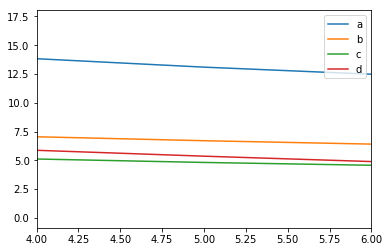

In [7]:
import matplotlib.pyplot as plt
NS= [x for x in range(10000)]
plt.plot(NS,anss[0],NS,anss[1],NS,anss[2],NS,anss[3])
plt.legend(['a','b','c','d'])
plt.xlim(4,6)
plt.show()


In [9]:
import matplotlib.pyplot as plt

import numpy as np
import random as rn
pts=[[rn.random()*2-1, rn.random()*2-1]  for i in range(10000) ]
vals=[[np.sin(np.pi* pts[x][0]),np.sin(np.pi*pts[x][1])] for x in range(10000)]

def mfinder(x1,x2):
    m=x1*np.sin(np.pi*x1)/(x1**2 + x2**2)+ x2*np.sin(np.pi*x2)/(x1**2 + x2**2)
    return m
m1=mfinder(pts[0][0],pts[0][1])
ms=[mfinder(pts[x][0],pts[x][1]) for x in range(10000)]    

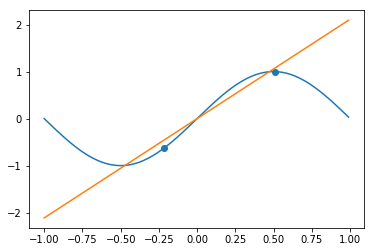

([0.6221429905938993, 0.2925691957362395],
 [0.92727707048146923, 0.79507621813508833])

In [18]:
t=np.arange(-1,1,.01)
ty=[np.sin(np.pi*x) for x in t]


plt.plot(t,ty)

k=rn.randint(0,-1+10000)
my=[ms[k]*x for x in t]
plt.scatter(pts[k],vals[k])
plt.plot(t,my)
plt.show()
pts[0],vals[0]

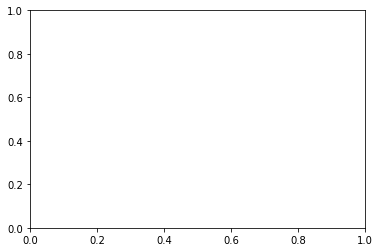

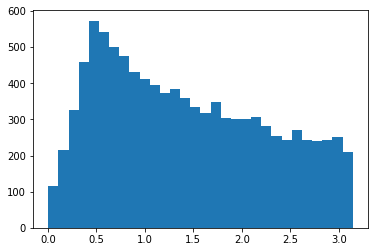

In [21]:
plt.figure()
plt.hist(ms,30)
plt.show()


In [25]:
mexp=np.average(ms)
sqerr=[(vals[i][1]-pts[i][1]*mexp)**2 for i in range(10000)]


In [26]:
np.average(sqerr)

0.27200326377372486

In [28]:
ed=[.5*((ms[i]*pts[i][0]-pts[i][0]*mexp)**2+(ms[i]*pts[i][1]-pts[i][1]*mexp)**2) for i in range(10000)]
np.average(ed)

0.20401316667974362

In [35]:
bs=[np.average([vals[i][0],vals[i][1]]) for i in range(10000)]
print(np.average(bs))
eouts=[]
for i in range(10000):
    ers=0
    for k in range(len(t)):
        ers=ers+(ty[k]-bs[i])**2
        
    eouts.append(ers/len(t))
print(np.average(eouts))

0.000674846903061
0.75003563377


In [37]:
# bs=[np.average([vals[i][0],vals[i][1]]) for i in range(10000)]
print(np.average(bs))
eouts=[]
for i in range(10000):
    ers=0
    for k in range(len(t)):
        ers=ers+(ty[k]-ms[i]*t[k])**2
        
    eouts.append(ers/len(t))
print(np.average(eouts))

0.000674846903061
0.508106965187


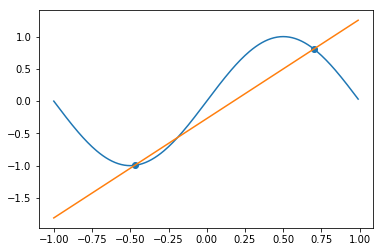

1.86336098347


In [42]:
# bs=[np.average([vals[i][0],vals[i][1]]) for i in range(10000)]
m_new=[(vals[i][1]-vals[i][0])/(pts[i][1]-pts[i][0]) for i in range(10000)]
b_new=[vals[i][0]-m_new[i]*pts[i][0] for i in range(10000)]
plt.plot(t,ty)
k=rn.randint(0,-1+10000)
my=[m_new[k]*x+b_new[k] for x in t]
plt.scatter(pts[k],vals[k])
plt.plot(t,my)
plt.show()
eouts=[]
for i in range(10000):
    ers=0
    for k in range(len(t)):
        ers=ers+(ty[k]-(m_new[i]*t[k]+b_new[i]))**2
        
    eouts.append(ers/len(t))
print(np.average(eouts))